In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy

In [2]:
from py.utils import verifyDir

In [3]:
DATA_PATH = "data/PlacePulse_2/"

QSCORE_PATH = f"{DATA_PATH}/Qscores/all/Summaries/"

MAIN_OUT_PATH = "outputs/"

OUT_DETECT_PATH = f"{MAIN_OUT_PATH}segmentations/"

OUT_IMAGE_PATH = f"{MAIN_OUT_PATH}segmented_images/"

CACHE_PATH = f"{MAIN_OUT_PATH}/cache/"

In [4]:
verifyDir(CACHE_PATH)

### Drawing features presence

In [5]:
pp_df = pd.read_csv(f"{QSCORE_PATH}summary_safety.csv", low_memory=False)
pp_df.rename(columns={"ID": "image_file_name"}, inplace=True)
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111389 entries, 0 to 111388
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   image_file_name       111389 non-null  object 
 1   safety                111389 non-null  float64
 2   W_ratio_safety        111389 non-null  float64
 3   L_ratio_safety        111389 non-null  float64
 4   wins_safety           111389 non-null  int64  
 5   draws_safety          111389 non-null  int64  
 6   losses_safety         111389 non-null  int64  
 7   wins_against_safety   111389 non-null  object 
 8   loss_against_safety   111389 non-null  object 
 9   draws_against_safety  111389 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.5+ MB


In [6]:
segment_city_df = pd.read_csv(f"{MAIN_OUT_PATH}objects_deeplab_xception.csv", sep=";", low_memory=False)

In [7]:
df_ = segment_city_df.loc[:, (segment_city_df != 0).any(axis=0)].copy()
df_["city"] = df_["image_file_name"].apply(lambda x: x.split("_")[3])
df_["image_file_name"] = df_["image_file_name"].apply(lambda x: x.split("_")[2])
df_ = df_[df_["city"]=="RioDeJaneiro"].copy()
df_

,image_file_name,wall,building,sky,floor,tree,ceiling,road,bed,windowpane,...,crt,plate,monitor,bulletin,shower,radiator,glass,clock,flag,city
74466,50f5eb23fdc9f065f000803f,0.548299,25.935872,15.742493,0.0,19.835917,0.0,18.973796,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro
74467,50f5eb42fdc9f065f0008131,1.455180,20.567830,25.163269,0.0,12.069194,0.0,33.838399,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro
74468,50f5eb6cfdc9f065f0008305,15.660095,6.741842,41.242981,0.0,7.948303,0.0,20.939128,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro
74469,50f5eacffdc9f065f0007d59,1.232402,23.615011,34.235636,0.0,0.000000,0.0,35.020447,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro
74470,50f5eaf3fdc9f065f0007eb2,12.834676,22.322591,33.864339,0.0,2.456156,0.0,18.447367,0.0,0.740051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.197347,RioDeJaneiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78120,50f5ec41fdc9f065f00088d4,0.270589,4.598999,33.438619,0.0,18.899536,0.0,29.308573,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro
78121,50f5eacefdc9f065f0007d4e,10.326640,2.644857,33.279419,0.0,15.949504,0.0,34.936523,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro
78122,50f5ead5fdc9f065f0007dc4,33.783468,2.971903,27.566020,0.0,1.245117,0.0,18.130493,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004578,0.000000,RioDeJaneiro
78123,50f5ec13fdc9f065f00086c2,1.428223,14.553324,38.344828,0.0,1.779683,0.0,36.213175,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro


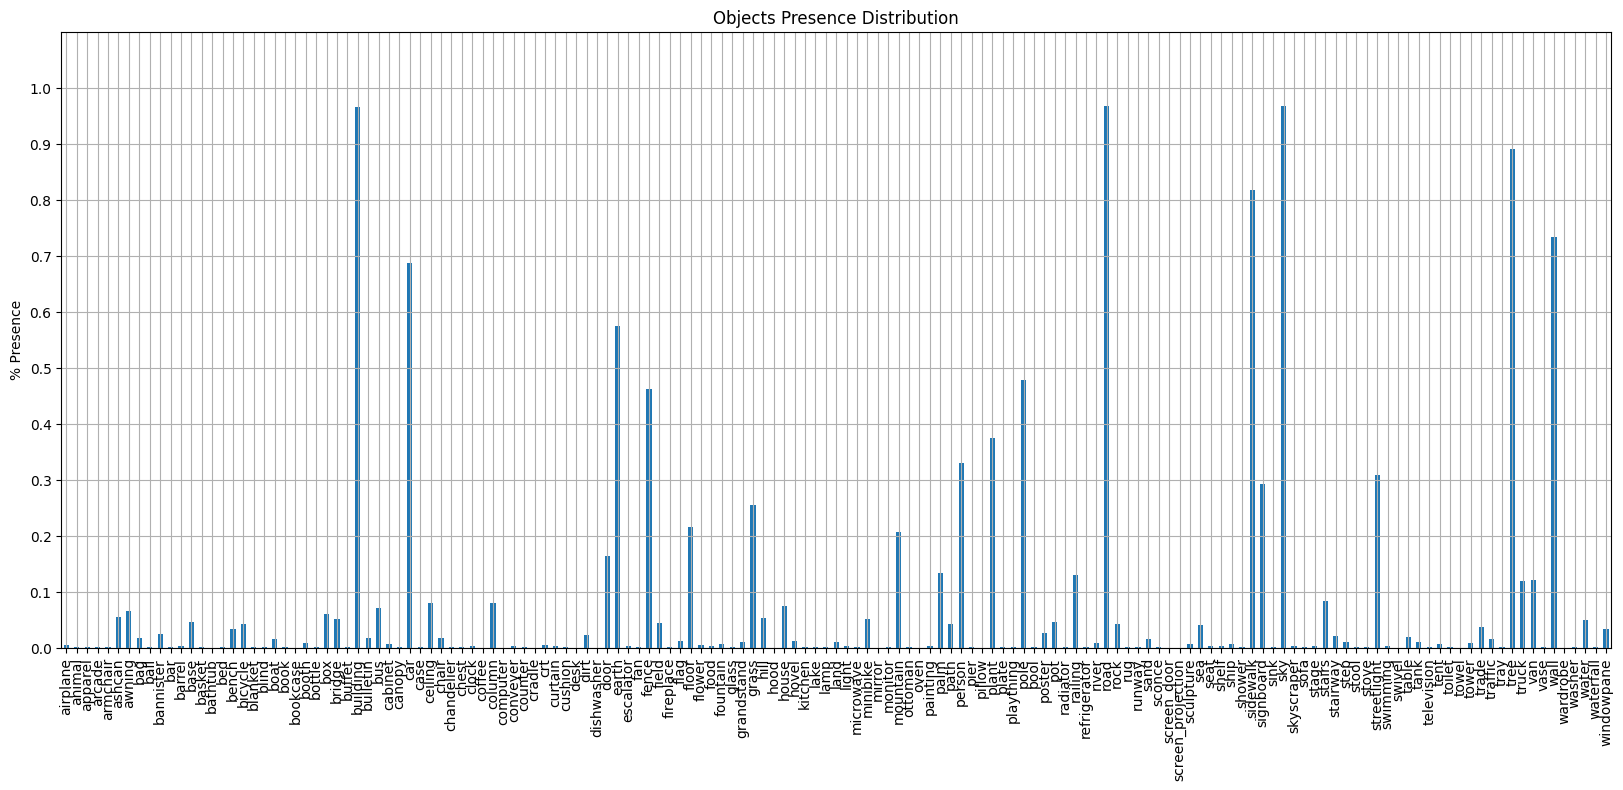

In [8]:
# Total
X_df = df_.iloc[:, 1:-1].copy()
X_df = X_df[np.sort(X_df.columns)]
X_df[X_df > 0] = 1

sum_df = X_df.sum()/len(X_df)

ax = sum_df.plot(kind="bar", figsize=(20,8), ylabel="% Presence", rot=90, ylim=(0.0,1.1), yticks=list(np.arange(0,1.1,0.10)))
plt.title(f"Objects Presence Distribution")
plt.grid(True)
plt.show()
# plt.savefig(f"{MAIN_OUT_PATH}objects_distribution.png", bbox_inches='tight', pad_inches = 0.5)
# plt.clf()
# plt.cla()
# plt.close()

### Generating samples 

In [9]:
data_df = pd.merge(df_, pp_df[["image_file_name", "safety"]], on="image_file_name", how="left")
data_df["labels"] = data_df["safety"].apply(lambda x: 1 if x>=5.0 else 0 )

In [10]:
new_columns = np.concatenate( (np.array(["image_file_name"]), np.sort(X_df.columns.values)) )
data_df.columns = np.concatenate( (new_columns, np.array(["city", "safety", "labels"])) )

In [11]:
data_df

,image_file_name,airplane,animal,apparel,arcade,armchair,ashcan,awning,bag,ball,...,vase,wall,wardrobe,washer,water,waterfall,windowpane,city,safety,labels
0,50f5eb23fdc9f065f000803f,0.548299,25.935872,15.742493,0.0,19.835917,0.0,18.973796,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro,2.875374,0
1,50f5eb42fdc9f065f0008131,1.455180,20.567830,25.163269,0.0,12.069194,0.0,33.838399,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro,5.474644,1
2,50f5eb6cfdc9f065f0008305,15.660095,6.741842,41.242981,0.0,7.948303,0.0,20.939128,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro,6.250000,1
3,50f5eacffdc9f065f0007d59,1.232402,23.615011,34.235636,0.0,0.000000,0.0,35.020447,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro,3.243647,0
4,50f5eaf3fdc9f065f0007eb2,12.834676,22.322591,33.864339,0.0,2.456156,0.0,18.447367,0.0,0.740051,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.197347,RioDeJaneiro,3.616934,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3654,50f5ec41fdc9f065f00088d4,0.270589,4.598999,33.438619,0.0,18.899536,0.0,29.308573,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro,2.739050,0
3655,50f5eacefdc9f065f0007d4e,10.326640,2.644857,33.279419,0.0,15.949504,0.0,34.936523,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro,3.525271,0
3656,50f5ead5fdc9f065f0007dc4,33.783468,2.971903,27.566020,0.0,1.245117,0.0,18.130493,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.004578,0.000000,RioDeJaneiro,1.778743,0
3657,50f5ec13fdc9f065f00086c2,1.428223,14.553324,38.344828,0.0,1.779683,0.0,36.213175,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,RioDeJaneiro,4.754533,0


In [12]:
city_df = data_df.iloc[:, -3].copy()
Y_df = data_df.iloc[:, -1].copy()
X_df = data_df.iloc[:, 1:-3].copy()
X_df.shape, Y_df.shape

((3659, 149), (3659,))

### Standard Scaler

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

### Classifiers

In [15]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

In [16]:
random_state = 42
regularizer_value = np.logspace(-3, 3, num=7)
class_weight = [None, 'balanced']
type_scaler = ['passthrough', scaler]
#dim_reductor = [t_svd, pca, sparse_pca]
type_penalty = ['l1', 'l2']

In [17]:
lr = LogisticRegression(
    tol=1e-3,
    dual=False,  # Prefer dual=False when n_samples > n_features
    random_state=random_state,
    max_iter=1e3,
)

param_lr = {}
param_lr['scaler'] = copy.deepcopy(type_scaler)
#param_lr['dim_reductor'] = copy.deepcopy(dim_reductor)
param_lr['classifier__C'] = copy.deepcopy(regularizer_value)
param_lr['classifier__class_weight'] = copy.deepcopy(class_weight)
param_lr['classifier__penalty'] = copy.deepcopy(type_penalty)
param_lr['classifier'] = [lr]

In [18]:
ridge = RidgeClassifier(
    tol=1e-3,
    random_state=random_state,
    max_iter=1e3,
)

param_ridge = {}
param_ridge['scaler'] = copy.deepcopy(type_scaler)
# param_ridge['dim_reductor'] = copy.deepcopy(dim_reductor)
param_ridge['classifier__alpha'] = copy.deepcopy(regularizer_value)
param_ridge['classifier__class_weight'] = copy.deepcopy(class_weight)
param_ridge['classifier'] = [ridge]

In [19]:
linear_svm = LinearSVC(
    tol=1e-3,
    random_state=42,
    max_iter=1e3,
)


param_linear_svm = {}
param_linear_svm['scaler'] = copy.deepcopy(type_scaler)
# param_linear_svm['dim_reductor'] = copy.deepcopy(dim_reductor)
param_linear_svm['classifier__C'] = copy.deepcopy(regularizer_value)
param_linear_svm['classifier__class_weight'] = copy.deepcopy(class_weight)
param_linear_svm['classifier__penalty'] = copy.deepcopy(type_penalty)
param_linear_svm['classifier'] = [linear_svm]

### Create Pipeline

In [20]:
from joblib import Memory

In [21]:
memory = Memory(
    location=CACHE_PATH,
    # verbose=1,
)

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
pipeline = Pipeline(
    steps = [
        # 1. Scaler
        ('scaler', scaler),
        # 3. Model selecction
        ('classifier', lr),
    ],
    memory=memory,
)

### Create GridSearch

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [25]:
param_grid = [param_lr, 
              param_ridge, 
              param_linear_svm]

In [26]:
grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring='balanced_accuracy',
            refit=True,
            cv=StratifiedKFold(n_splits=5),  # << Use time series
            verbose=4,
)

In [27]:
grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(memory=Memory(location=outputs//cache/joblib),
                                steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000.0,
                                                           random_state=42,
                                                           tol=0.001))]),
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000.0,
                                                            random_state=42,
                                                            tol=0.001)],
                          'clas...
                          'classifier__class_weight': [None, 'balanced'],
                          'scaler': ['passthrough', StandardScaler()]},
                         {'classifier': [LinearSVC(max_iter=1000.0,
                 

### Data Split

In [28]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(X_df, 
                                                Y_df, 
                                                train_size=0.8, 
                                                random_state=random_state,
                                                stratify=Y_df
                                               )
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(2927, 149) (2927,) (732, 149) (732,)


### Training

In [30]:
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, 

[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.520 total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.504 total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.506 total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.513 total time=   0.0s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weig

[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.495 total time=   0.1s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.534 total time=   0.1s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.503 total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.510 total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=No

[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.527 total time=   0.1s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.505 total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.520 total time=   0.1s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.510 total time=   0.1s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, c

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.496 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.534 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.508 total time=   0.3s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.509 total time=   0.4s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.510 total time=   0.3s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.503 total time=   0.0s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=No

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.659 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.640 total time=   0.2s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.654 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.635 total time=   0.2s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.624 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.657 total time=   0.0s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.658 total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classi

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.531 total time=   0.2s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.512 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.510 total time=   0.2s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.510 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.503 total time=   0.1s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.531 total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.518 total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.510 total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classif

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.658 total time=   0.2s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.652 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.655 total time=   0.2s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.641 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.628 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.651 total time=   0.1s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.649 total time=   0.1s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.655 total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.500 total time=   0.2s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.529 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.510 total time=   0.2s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.509 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.510 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.502 total time=   0.1s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.527 total time=   0.1s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.523 total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classif

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.651 total time=   0.3s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.650 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.654 total time=   0.2s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.640 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.624 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.650 total time=   0.1s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.649 total time=   0.1s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.651 total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.503 total time=   0.2s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.531 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.509 total time=   0.2s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.511 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.510 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.506 total time=   0.2s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.526 total time=   0.2s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.527 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.510 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.527 total time=   0.3s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classi

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.657 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.647 total time=   0.2s
[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.656 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.641 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.618 total time=   0.3s
[CV 1/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.649 total time=   0.4s
[CV 2/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.644 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

[CV 3/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.651 total time=   0.2s
[CV 4/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.628 total time=   0.2s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END classifier=LogisticRegression(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.639 total time=   0.2s
[CV 1/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.001, classifier__class_weight=None, scaler=passthrough;, score=0.497 total time=   0.0s
[CV 2/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.001, classifier__class_weight=None, scaler=passthrough;, score=0.507 total time=   0.0s
[CV 3/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.001, classifier__class_weight=None, scaler=passthrough;, score=0.506 total time=   0.0s
[CV 4/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.001, classifier__class_weight=None, scaler=passthrough;, score=0.499 total time=   0.0s
[CV 5/5] END classifier=RidgeClassifier(m

[CV 4/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.1, classifier__class_weight=None, scaler=passthrough;, score=0.499 total time=   0.0s
[CV 5/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.1, classifier__class_weight=None, scaler=passthrough;, score=0.503 total time=   0.0s
[CV 1/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.1, classifier__class_weight=None, scaler=StandardScaler();, score=0.491 total time=   0.0s
[CV 2/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.1, classifier__class_weight=None, scaler=StandardScaler();, score=0.512 total time=   0.0s
[CV 3/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=0.1, classifier__class_weight=None, scaler=StandardScaler();, score=0.506 total time=   0.0s
[CV 4/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), class

[CV 4/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=10.0, classifier__class_weight=None, scaler=StandardScaler();, score=0.507 total time=   0.0s
[CV 5/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=10.0, classifier__class_weight=None, scaler=StandardScaler();, score=0.508 total time=   0.0s
[CV 1/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=10.0, classifier__class_weight=balanced, scaler=passthrough;, score=0.651 total time=   0.0s
[CV 2/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=10.0, classifier__class_weight=balanced, scaler=passthrough;, score=0.647 total time=   0.0s
[CV 3/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=10.0, classifier__class_weight=balanced, scaler=passthrough;, score=0.658 total time=   0.0s
[CV 4/5] END classifier=RidgeClassifier(max_iter=1000.0, random_stat

[CV 3/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=1000.0, classifier__class_weight=balanced, scaler=passthrough;, score=0.664 total time=   0.0s
[CV 4/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=1000.0, classifier__class_weight=balanced, scaler=passthrough;, score=0.653 total time=   0.0s
[CV 5/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=1000.0, classifier__class_weight=balanced, scaler=passthrough;, score=0.641 total time=   0.0s
[CV 1/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=1000.0, classifier__class_weight=balanced, scaler=StandardScaler();, score=0.678 total time=   0.0s
[CV 2/5] END classifier=RidgeClassifier(max_iter=1000.0, random_state=42), classifier__alpha=1000.0, classifier__class_weight=balanced, scaler=StandardScaler();, score=0.675 total time=   0.0s
[CV 3/5] END classifier=RidgeClassifier(max_iter=1

[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.668 total time=   0.0s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.667 total time=   0.0s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.662 total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.650 total time=   0.0s
[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.001, classifier__class_weight=balanc

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.491 total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.513 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.498 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.507 total time=   0.1s
[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.499 total time=   0.1s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.499 total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.514 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=None, classifier__penalty=l2, scaler=

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.648 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.659 total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.643 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.638 total time=   0.1s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.659 total time=   0.1s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.661 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.662 total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.01, classifier__class_weight=balanced, classi

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.517 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.503 total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.503 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.507 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.498 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.519 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.506 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.510 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.516 total time=   0.3s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l1, scaler=

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.605 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.576 total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.624 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.551 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.654 total time=   0.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.660 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.645 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.631 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=0.1, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.640 total time=   0.3s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.514 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.499 total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.591 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.496 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.503 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.514 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.514 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.508 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.511 total time=   0.3s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.536 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.515 total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.506 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.621 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.659 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.651 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.649 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.635 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.651 total time=   0.3s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthro

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.508 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.553 total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.505 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.501 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.520 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.514 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.537 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.511 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.533 total time=   0.3s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l1, sc

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.505 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.540 total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.499 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.500 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.648 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.629 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.576 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.559 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=10.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.597 total time=   0.3s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l1, scaler=pas

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.526 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.553 total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.560 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.501 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.509 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.557 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.631 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.533 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.505 total time=   0.3s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.501 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.553 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.559 total time=   0.1s
[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.501 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.588 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.527 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.505 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.514 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=100.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.546 total time=   0.3s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l1, scale

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.524 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.553 total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.559 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=passthrough;, score=0.501 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.525 total time=   0.4s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.521 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.533 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.473 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=None, classifier__penalty=l2, scaler=StandardScaler();, score=0.586 total time=   0.3s
[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l1, scaler=passthrough;, score=nan total time=   0.0s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__pena

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.524 total time=   0.1s
[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.553 total time=   0.1s
[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.559 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=passthrough;, score=0.501 total time=   0.1s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.498 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.529 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.556 total time=   0.3s


/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.521 total time=   0.3s
[CV 5/5] END classifier=LinearSVC(max_iter=1000.0, random_state=42, tol=0.001), classifier__C=1000.0, classifier__class_weight=balanced, classifier__penalty=l2, scaler=StandardScaler();, score=0.545 total time=   0.3s
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(StandardScaler(),        airplane     animal    apparel    arcade  armchair    ashcan  \
918    4.605611  21.470133  30.503337  0.028992  1.017253  0.056966   
1618   0.341288  12.695821  35.030111  0.000000  0.428263  0.000000   
2375   0.000000  65.798950   9.904480  0.000000  0.000000  0.000000   
2640   0.000000  64.254252   0.000000  0.000000  0.000000  0.000000   
2407   5.784607  19.221497  24.4400

/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
280 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/home/felipe/anaconda3/envs/segmentator/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/felipe/anaconda3/envs/segmentator/lib/pyt

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(memory=Memory(location=outputs//cache/joblib),
                                steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000.0,
                                                           random_state=42,
                                                           tol=0.001))]),
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000.0,
                                                            random_state=42,
                                                            tol=0.001)],
                          'clas...
                          'classifier__class_weight': [None, 'balanced'],
                          'scaler': ['passthrough', StandardScaler()]},
                         {'classifier': [LinearSVC(max_iter=1000.0,
                 

### Results

In [31]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_scaler,param_classifier__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000972,0.000357,0.000000,0.000000,"LogisticRegression(max_iter=1000.0, random_sta...",0.001,None,l1,passthrough,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140
1,0.031559,0.001301,0.000000,0.000000,"LogisticRegression(max_iter=1000.0, random_sta...",0.001,None,l1,StandardScaler(),NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106
2,0.015106,0.005793,0.001741,0.000296,"LogisticRegression(max_iter=1000.0, random_sta...",0.001,None,l2,passthrough,NaN,{'classifier': LogisticRegression(max_iter=100...,0.491632,0.520010,0.503627,0.506208,0.512841,0.506863,0.009502,64
3,0.009502,0.000301,0.001839,0.000141,"LogisticRegression(max_iter=1000.0, random_sta...",0.001,None,l2,StandardScaler(),NaN,{'classifier': LogisticRegression(max_iter=100...,0.504630,0.505075,0.509346,0.500000,0.500000,0.503810,0.003520,74
4,0.000720,0.000064,0.000000,0.000000,"LogisticRegression(max_iter=1000.0, random_sta...",0.001,balanced,l1,passthrough,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.342485,0.021506,0.002223,0.000319,"LinearSVC(max_iter=1000.0, random_state=42, to...",1000.0,None,l2,StandardScaler(),NaN,"{'classifier': LinearSVC(max_iter=1000.0, rand...",0.524601,0.520862,0.532925,0.472745,0.586216,0.527470,0.036132,46
136,0.002860,0.000365,0.000000,0.000000,"LinearSVC(max_iter=1000.0, random_state=42, to...",1000.0,balanced,l1,passthrough,NaN,"{'classifier': LinearSVC(max_iter=1000.0, rand...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,107
137,0.008073,0.000312,0.000000,0.000000,"LinearSVC(max_iter=1000.0, random_state=42, to...",1000.0,balanced,l1,StandardScaler(),NaN,"{'classifier': LinearSVC(max_iter=1000.0, rand...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,108
138,0.088517,0.005008,0.001694,0.000118,"LinearSVC(max_iter=1000.0, random_state=42, to...",1000.0,balanced,l2,passthrough,NaN,"{'classifier': LinearSVC(max_iter=1000.0, rand...",0.566132,0.524485,0.552800,0.559252,0.501485,0.540831,0.024241,40


In [32]:
grid_search.best_estimator_

Pipeline(memory=Memory(location=outputs//cache/joblib),
         steps=[('scaler', StandardScaler()),
                ('classifier',
                 RidgeClassifier(alpha=1000.0, class_weight='balanced',
                                 max_iter=1000.0, random_state=42))])

In [33]:
print(classification_report(
    ytest,
    grid_search.predict(xtest),
    digits=4,
))

              precision    recall  f1-score   support

           0     0.9031    0.6868    0.7802       597
           1     0.3273    0.6741    0.4407       135

    accuracy                         0.6844       732
   macro avg     0.6152    0.6804    0.6104       732
weighted avg     0.7969    0.6844    0.7176       732



### Feature Importance

In [34]:
importance_classes = data_df.columns[1:-3]
importance_classes.values

array(['airplane', 'animal', 'apparel', 'arcade', 'armchair', 'ashcan',
       'awning', 'bag', 'ball', 'bannister', 'bar', 'barrel', 'base',
       'basket', 'bathtub', 'bed', 'bench', 'bicycle', 'blanket', 'blind',
       'boat', 'book', 'bookcase', 'booth', 'bottle', 'box', 'bridge',
       'buffet', 'building', 'bulletin', 'bus', 'cabinet', 'canopy',
       'car', 'case', 'ceiling', 'chair', 'chandelier', 'chest', 'clock',
       'coffee', 'column', 'computer', 'conveyer', 'counter', 'cradle',
       'crt', 'curtain', 'cushion', 'desk', 'dirt', 'dishwasher', 'door',
       'earth', 'escalator', 'fan', 'fence', 'field', 'fireplace', 'flag',
       'floor', 'flower', 'food', 'fountain', 'glass', 'grandstand',
       'grass', 'hill', 'hood', 'house', 'hovel', 'kitchen', 'lake',
       'lamp', 'land', 'light', 'microwave', 'minibike', 'mirror',
       'monitor', 'mountain', 'ottoman', 'oven', 'painting', 'palm',
       'path', 'person', 'pier', 'pillow', 'plant', 'plate', 'plaything',


In [35]:
importance = grid_search.best_estimator_._final_estimator.coef_[0]

In [36]:
feat_importances = pd.Series(importance)
feat_importances = feat_importances.reset_index().rename(columns={"index":"class", 0:"importance"}).copy()
feat_importances["class"] = importance_classes.values
feat_importances.set_index("class", inplace=True)
feat_importances.sort_values(by="importance", inplace=True, ascending=False)
feat_importances

,importance
class,
awning,0.097326
armchair,0.086121
bannister,0.069593
kitchen,0.060624
barrel,0.047047
...,...
basket,-0.033003
pole,-0.038700
airplane,-0.066566


<AxesSubplot:title={'center':'Feature Importance'}, ylabel='class'>

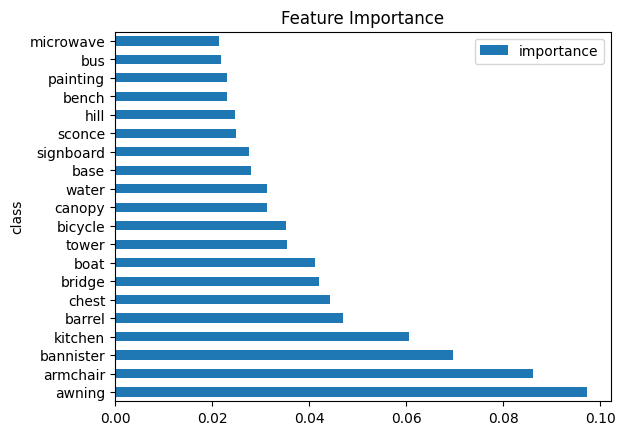

In [37]:
feat_importances.iloc[:20,:].plot(kind='barh',title = 'Feature Importance')

### Components

In [38]:
data_df[data_df["image_file_name"]=="5140b8a0fdc9f04926001cb5"].columns.values

array(['image_file_name', 'airplane', 'animal', 'apparel', 'arcade',
       'armchair', 'ashcan', 'awning', 'bag', 'ball', 'bannister', 'bar',
       'barrel', 'base', 'basket', 'bathtub', 'bed', 'bench', 'bicycle',
       'blanket', 'blind', 'boat', 'book', 'bookcase', 'booth', 'bottle',
       'box', 'bridge', 'buffet', 'building', 'bulletin', 'bus',
       'cabinet', 'canopy', 'car', 'case', 'ceiling', 'chair',
       'chandelier', 'chest', 'clock', 'coffee', 'column', 'computer',
       'conveyer', 'counter', 'cradle', 'crt', 'curtain', 'cushion',
       'desk', 'dirt', 'dishwasher', 'door', 'earth', 'escalator', 'fan',
       'fence', 'field', 'fireplace', 'flag', 'floor', 'flower', 'food',
       'fountain', 'glass', 'grandstand', 'grass', 'hill', 'hood',
       'house', 'hovel', 'kitchen', 'lake', 'lamp', 'land', 'light',
       'microwave', 'minibike', 'mirror', 'monitor', 'mountain',
       'ottoman', 'oven', 'painting', 'palm', 'path', 'person', 'pier',
       'pillow', 'plan

In [39]:
data_df[data_df["image_file_name"]=="5140b8a0fdc9f04926001cb5"].values

array([], shape=(0, 153), dtype=object)